# Data analysis

### Import of libraries

In [2]:
import pandas as pd
import json
import numpy as np
# import scipy as sp
import matplotlib.pyplot as plt
import os, re, sys, glob, math
import warnings; warnings.simplefilter('ignore')
# import statsmodels.api as sm # import statsmodels
import lzma 
import base64
from statistics import mean, median
from matplotlib.ticker import PercentFormatter
# from datetime import datetime

### Import of data

In [3]:
subfolder = 'Base-Salient-Strategy'
outputpath = f'../output/{subfolder}/'
outputpathErrors = f'../output/{subfolder}/errors/'

### Cleaning data

In [4]:
def merge_all_files(keyword,subfolder='main'):
    all_files = glob.glob(os.path.join(r'../data/'+subfolder+'/', keyword + '*.csv'))
    return pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True, sort=True)

data = merge_all_files('inference',subfolder=subfolder)
sessions = ['h9b1099p'] 
# Only keep those in-session who finished 
data = data[data['session.code'].isin(sessions) & data['participant._current_page_name'].isin(['Redirect'])]
print(len(data))

30


## CQs

info_cost_cq_mistakes


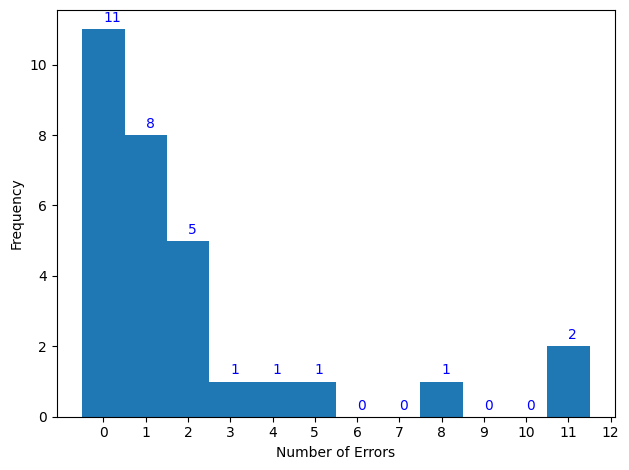

intro_cq_mistakes


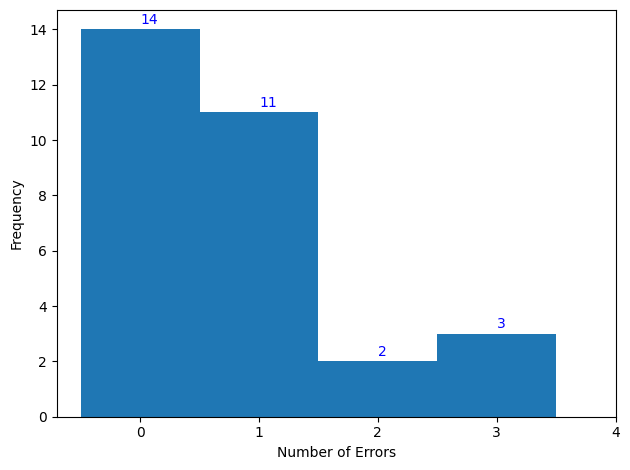

In [5]:
data['info_cost_cq_mistakes'] = data[['informational_cost.1.player.info_cost_cq_mistakes','informational_cost.2.player.info_cost_cq_mistakes','informational_cost.3.player.info_cost_cq_mistakes','informational_cost.4.player.info_cost_cq_mistakes','informational_cost.5.player.info_cost_cq_mistakes','strategy_method.1.player.info_cost_cq_mistakes','strategy_method.2.player.info_cost_cq_mistakes','strategy_method.3.player.info_cost_cq_mistakes','strategy_method.4.player.info_cost_cq_mistakes','strategy_method.5.player.info_cost_cq_mistakes']].sum(axis=1)
# print(data[['info_cost_cq_mistakes', 'strategy_method.1.player.info_cost_cq_mistakes','strategy_method.2.player.info_cost_cq_mistakes','strategy_method.3.player.info_cost_cq_mistakes', 'informational_cost.1.player.info_cost_cq_mistakes','informational_cost.2.player.info_cost_cq_mistakes','informational_cost.3.player.info_cost_cq_mistakes']])
data['intro_cq_mistakes'] = data[['informational_cost.1.player.intro_cq_mistakes', 'strategy_method.1.player.intro_cq_mistakes']].sum(axis=1)
# print(data[['intro_cq_mistakes','informational_cost.1.player.intro_cq_mistakes', 'strategy_method.1.player.intro_cq_mistakes']])

col_list = []
col_list_names = []
for col in data[['info_cost_cq_mistakes','intro_cq_mistakes']]:
    col_list.append(data[col])
    col_list_names.append(col)

for var in col_list:
    try:
        print(var.name)
        fig, ax = plt.subplots()
        y = [int(i) for i in  var]
        xLabels = range(max(y)+2)
        x = np.arange(max(y)+2)
        ax.hist(y,x-0.5, width=1)
        plt.ylabel('Frequency')
        for i in range(max(y)+1):
            plt.text(i,y.count(i)+.2,y.count(i), color='blue')
        plt.xticks(x, xLabels)
        plt.xlabel('Number of Errors')
#         plt.title(f"{var.name[19:-9]}; N={len(var)}")
        plt.tight_layout()
#         plt.savefig(outputpathErrors+ var.name[10:-9] +'.png',dpi=1000)
        plt.show()
    except:
        print('Variable missing:', var.name)

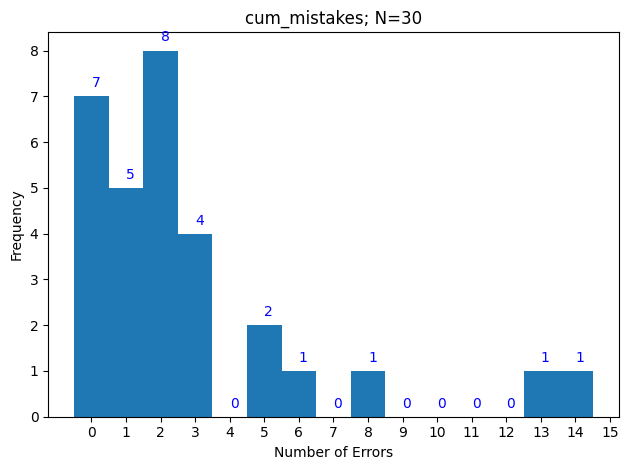

In [6]:
data['cum_mistakes']=data[col_list_names].sum(axis=1)

maximum_mistakes_allowed = 100 
var = data[data['cum_mistakes']<maximum_mistakes_allowed]['cum_mistakes']
fig, ax = plt.subplots()
y = [int(i) for i in  var]
xLabels = range(max(y)+2)
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+1):
    plt.text(i,y.count(i)+.2,y.count(i), color='blue')
plt.xticks(x, xLabels)
plt.xlabel('Number of Errors')
plt.title(f"{var.name}; N={len(var)}")
plt.tight_layout()
plt.savefig(outputpathErrors+ var.name +'.png',dpi=1000)
plt.show()

data = data[data['cum_mistakes']<maximum_mistakes_allowed]

### Destring param_rounds 

In [7]:
try:
    for ind in data.index:
        ini_list = data['participant.param_rounds'][ind]
        res = ini_list.strip('][').split(', ')
        data['participant.param_rounds'][ind] = res
    print(data['participant.param_rounds'])
except:
    print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')

1     [2, 4, 3, 5, 1]
2     [1, 3, 2, 4, 5]
3     [2, 4, 5, 3, 1]
4     [4, 5, 1, 3, 2]
5     [5, 4, 3, 1, 2]
6     [4, 2, 5, 1, 3]
7     [4, 5, 1, 2, 3]
8     [5, 4, 2, 1, 3]
9     [3, 5, 2, 1, 4]
10    [2, 1, 3, 5, 4]
11    [3, 2, 5, 4, 1]
12    [5, 1, 2, 4, 3]
13    [2, 1, 5, 3, 4]
14    [5, 2, 4, 1, 3]
15    [5, 1, 2, 3, 4]
16    [3, 4, 2, 5, 1]
17    [3, 4, 5, 1, 2]
18    [1, 5, 3, 2, 4]
20    [1, 2, 5, 4, 3]
21    [1, 2, 3, 4, 5]
22    [2, 5, 1, 4, 3]
23    [1, 2, 4, 3, 5]
24    [4, 5, 2, 1, 3]
25    [1, 2, 3, 5, 4]
26    [3, 2, 4, 5, 1]
28    [4, 5, 3, 2, 1]
29    [5, 2, 1, 4, 3]
30    [3, 5, 2, 1, 4]
31    [4, 2, 3, 1, 5]
32    [3, 5, 2, 4, 1]
Name: participant.param_rounds, dtype: object


### Risk taker indicator

In [8]:
# Create a column for each round, with that round's parameterization (which varies by participant)
for i in range(1,6):
    myList = []
    for ind in data.index:
        myList.append(int(data['participant.param_rounds'][ind][i-1]))
    #     print(myList,  data['participant.param_rounds'][ind])
    data[f'Round{i}Param'] = myList
#     print(data[f'Round{i}Param'].head(), data['participant.param_rounds'].head())

# Did each person choose the risky option in each round, given their idiosyncratic parameterization??
    risk_list = []
    for ind in data.index:
        param = data[f'Round{i}Param'][ind]
        risk_taker = 1 if data[f'lottery.1.player.lottery{param}_det'][ind] == 1 else 0
        risk_list.append(risk_taker)
    data[f'risk_taker_R{i}'] = risk_list

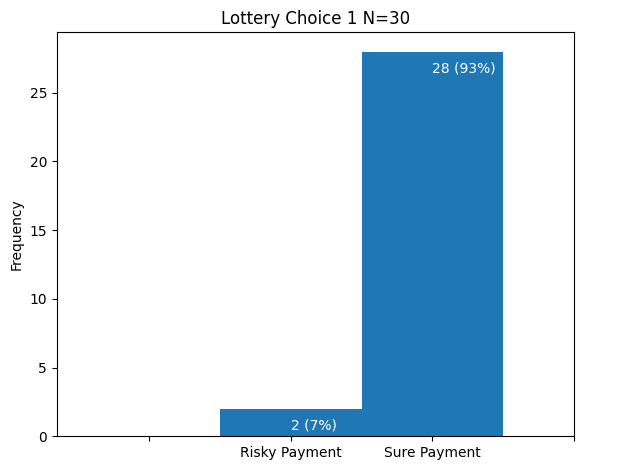

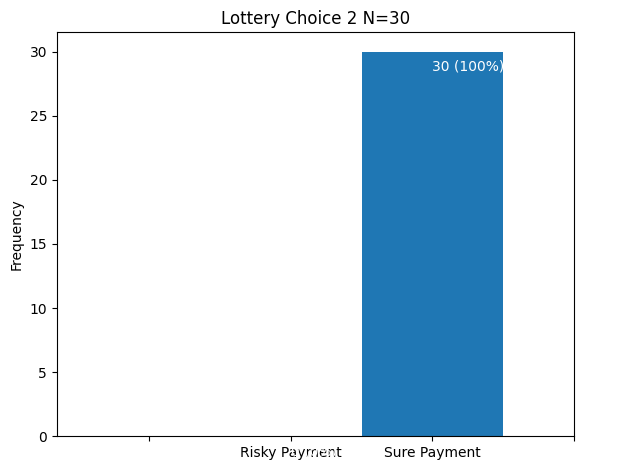

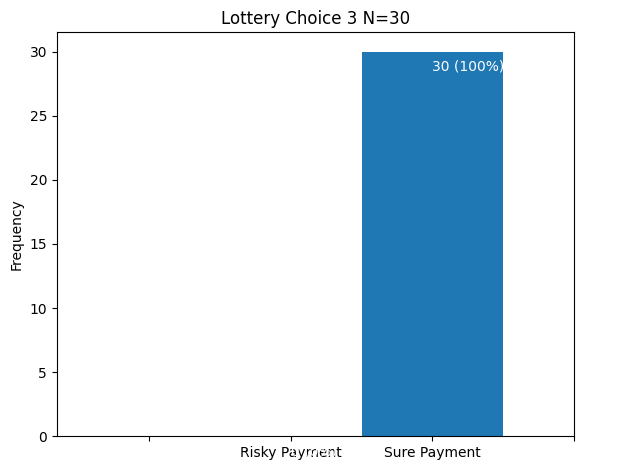

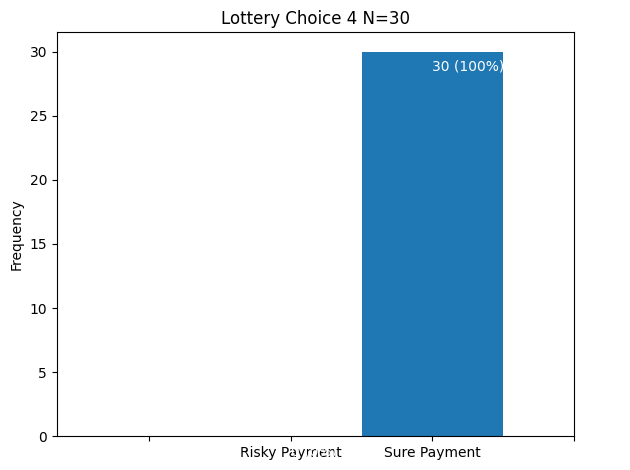

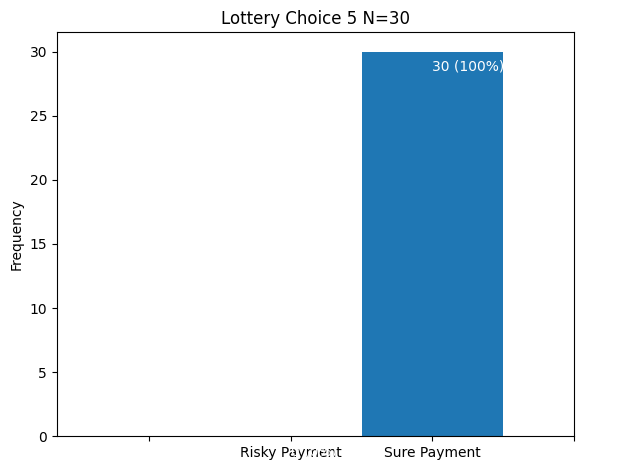

In [9]:
for i in range(1,6):    
    fig, ax = plt.subplots()
#     base_risk = base[base[f'risk_taker_R{i}'] == 1]
    y = [int(i) for i in data[f'lottery.1.player.lottery{i}_det']]
    xLabels = ['','Risky Payment', 'Sure Payment','']
    x = np.arange(max(y)+2)
    ax.hist(y,x-0.5, width=1)
    plt.ylabel('Frequency')
    for j in range(max(y)+2):
        plt.text(j,y.count(j)-1.5,str(y.count(j))+ ' (' + str(round(y.count(j)*100/len(y))) +'%)', color='white')
    plt.xticks(x, xLabels)
    plt.title(f'Lottery Choice {i} N={len(y)}')
    plt.tight_layout()
#     plt.savefig(outputpath + 'Base_environment1.png',dpi=1000)
    plt.show()

[6.666666666666671, 0.0, 0.0, 0.0, 0.0]


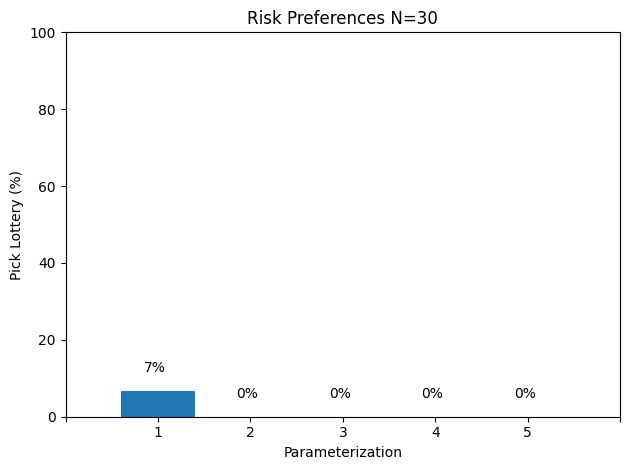

In [10]:
avgs = []
rounds_num = 5
for i in range(1,rounds_num+1):
    # lottery var takes values 1&2, where 1 is lottery and 2 is sure payment. 
    data[f'normalized.lottery{i}'] = data[f'lottery.1.player.lottery{i}_det'] - 1
    # now lottery var takes values 0&1, where 0 is lottery and 1 is sure payment. 
    avg_environment = 100-(data[f'normalized.lottery{i}'].mean())*100 # this is the share who picks lottery
    avgs.append(avg_environment)
print(avgs)
avgs_avg = sum(avgs[:rounds_num])/len(avgs[:rounds_num])

plt.bar(range(1,rounds_num+1), avgs, label=f'Deterministic N={len(data)}')
for j in range(5):
    plt.text(j+0.85,avgs[j]+5,str(round(avgs[j]))+'%')
plt.xlabel("Parameterization")
plt.ylabel("Pick Lottery (%)")
plt.xlim(1, rounds_num)
plt.xticks(np.arange(0,rounds_num+2), ['','1', '2', '3', '4', '5', ''])  # Set text labels.
plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
# plt.axhline(y=avgs_base_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
# plt.text(2.5,avgs_base_avg+3,str(round(avgs_base_avg,1))+'%')

# plt.legend(loc='center left')
plt.title(f'Risk Preferences N={len(data)}')
plt.tight_layout()
plt.savefig(outputpath + 'deterministic_risk_preferences.png',dpi=1000)
plt.show()

## Deterministic

In [11]:
deterministic = data[data['participant.treatment']== 'deterministic']
print('In Deterministic we have', len(deterministic['participant.treatment']), 'participants')
#  How many pooled in round 1 when pooling was optimal?
# print(deterministic[deterministic['Round1Param'] == 5]['informational_cost.1.player.environment_choice'])

# How many participants chose risky option in lottery associated with round 1 parameters?
print('Chose risky in first round:', deterministic[deterministic['risk_taker_R1'] == 1]['risk_taker_R1'].count(), '; Chose safe in first round:', deterministic[deterministic['risk_taker_R1'] == 0]['risk_taker_R1'].count())

In Deterministic we have 30 participants
Chose risky in first round: 0 ; Chose safe in first round: 30


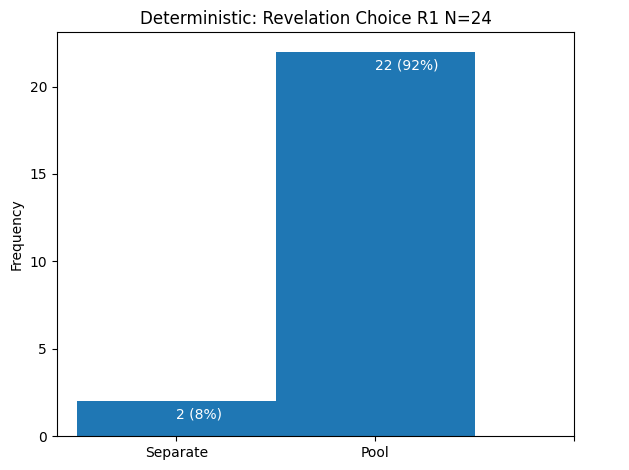

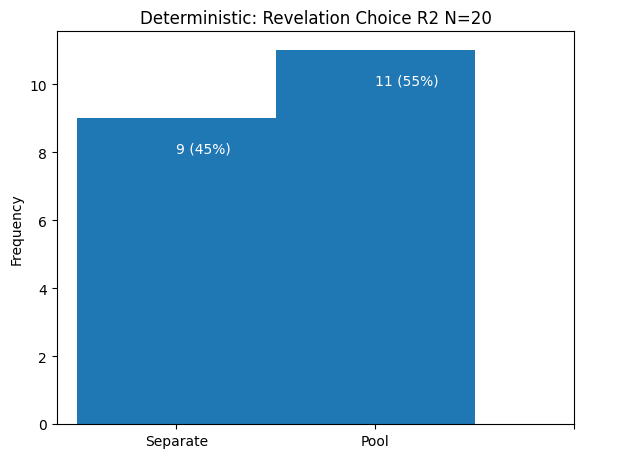

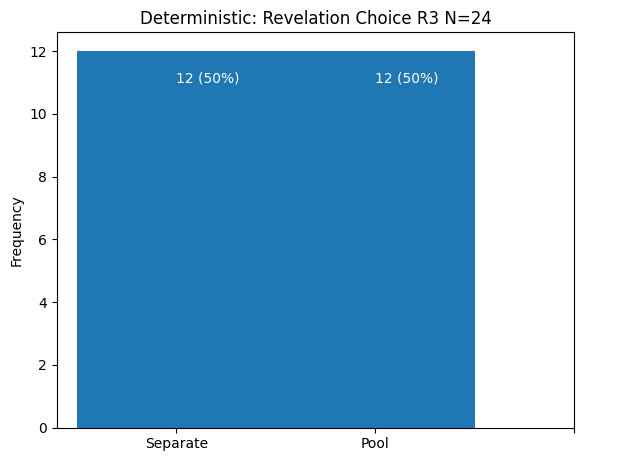

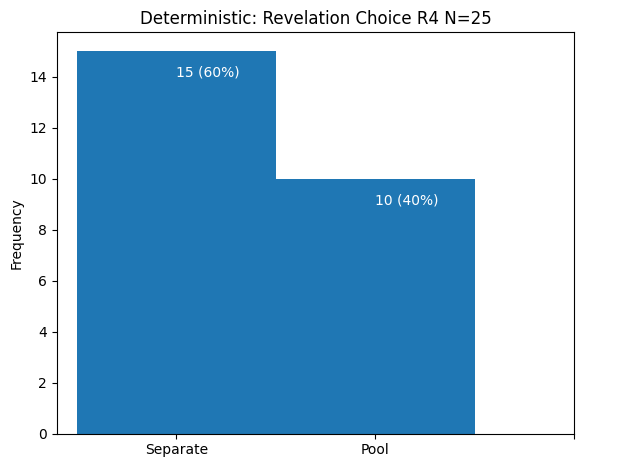

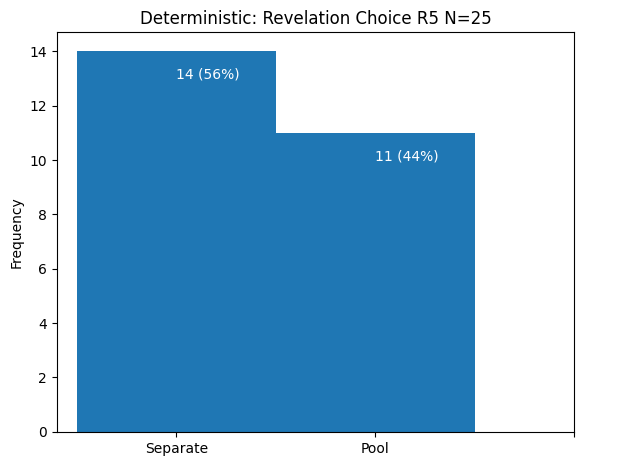

In [12]:
for i in range(1,6): 
    fig, ax = plt.subplots()
    deterministic_risk = deterministic[deterministic[f'risk_taker_R{i}'] == 0]  # plot only for the subsample of non-risk-takers
    y = [int(i) for i in deterministic_risk[deterministic_risk[f'Round{i}Param'] != 5][f'informational_cost.{i}.player.environment_choice']]
    xLabels = ['Separate', 'Pool', '']
    x = np.arange(max(y)+2)
    ax.hist(y,x-0.5, width=1)
    plt.ylabel('Frequency')
    for j in range(max(y)+2):
        plt.text(j,y.count(j)-1,str(y.count(j))+ ' (' + str(round(y.count(j)*100/len(y))) +'%)', color='white')
    plt.xticks(x, xLabels)
    plt.title(f'Deterministic: Revelation Choice R{i} N={len(y)}')
    plt.tight_layout()
    plt.savefig(outputpath + f'Deterministic_environment{i}.png',dpi=1000)
    plt.show()

## Revelation by decision

[91.66666666666666, 55.00000000000001, 50.0, 40.0, 44.0]


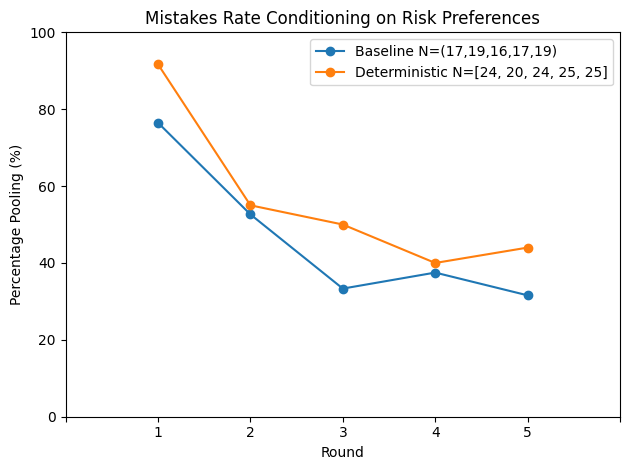

In [14]:
# avgs_base = []
# avgs_salient= []
# avgs_strategy = []
avgs_deterministic = []
rounds_num = 5
# for i in range(1,2):
lengths = [] 
for i in range(1,rounds_num+1):
    
# for i in range(1,2):
#   DETERMINISTIC
    deterministic_risk = deterministic[deterministic[f'risk_taker_R{i}'] == 0] # this picks people who picked safe option in that round's lottery
    avg_environment = deterministic_risk[deterministic_risk[f'Round{i}Param'] != 5][f'informational_cost.{i}.player.environment_choice'].mean()*100
    avgs_deterministic.append(avg_environment)
    lengths.append(len(deterministic_risk[deterministic_risk[f'Round{i}Param'] != 5]))
    
# #   BASELINE
#     base_risk = base[base[f'risk_taker_R{i}'] == 1] # this picks people who picked risky option in that round's lottery
#     base_risk = base_risk[base_risk[f'Round{i}Param'] != 5] # this kicks out those for whom pooling was optimal
#     avg_environment = base_risk[f'informational_cost.{i}.player.environment_choice'].mean()*100
#     avgs_base.append(avg_environment)

# # for i in range(1,2):
# #     SALIENT
#     salient_risk = salient[salient[f'risk_taker_R{i}'] == 1] # this picks people who picked risky option in that round's lottery
#     salient_risk = salient_risk[salient_risk[f'Round{i}Param'] != 5] # this kicks out those for whom pooling was optimal
#     avg_environment = salient_risk[f'informational_cost.{i}.player.environment_choice'].mean()*100
#     avgs_salient.append(avg_environment)
    
# # for i in range(1,2):    
# #     STRATEGY        
#     strategy_risk = strategy[strategy[f'risk_taker_R{i}'] == 1] # this picks people who picked risky option in that round's lottery
#     strategy_risk = strategy_risk[strategy_risk[f'Round{i}Param'] != 5] # this kicks out those for whom pooling was optimal
#     avg_environment = strategy_risk[f'strategy_method.{i}.player.environment_choice'].mean()*100
#     avgs_strategy.append(avg_environment)

# print('Chose risky in first round:', strategy[strategy['risk_taker_R1'] == 1]['risk_taker_R1'].count())
# print(avgs_base, avgs_strategy)
print(avgs_deterministic)

# avgs_base_avg = sum(avgs_base[:rounds_num])/len(avgs_base[:rounds_num])
# avgs_sal_avg = sum(avgs_salient[:rounds_num])/len(avgs_salient[:rounds_num])
# avgs_strategy_avg = sum(avgs_strategy[:rounds_num])/len(avgs_strategy[:rounds_num])

avgs_base=[76.47058823529412, 52.63157894736842, 33.33333333333333, 37.5, 31.57894736842105]
plt.plot(range(1,rounds_num+1), avgs_base, label=r'Baseline N=(17,19,16,17,19)', marker="o")
plt.plot(range(1,rounds_num+1), avgs_deterministic, label=f'Deterministic N={lengths}', marker="o")

# plt.plot(range(1,2), avgs_base, label=r'Baseline N=17', marker="o")

# plt.plot(range(1,2), avgs_salient, label=r'Salient N=20', marker="o")
# plt.plot(range(1,rounds_num+1), avgs_salient, label=r'Salient N=(20,20,14,21,22)', marker="o")
# plt.plot(range(1,rounds_num+1), avgs_strategy, label=r'Strategy Method N=(25,30,29,25,24)', marker="o")
# plt.plot(range(1,2), avgs_strategy, label=r'Strategy Method N=25', marker="o")

plt.xlabel("Round")
plt.ylabel("Percentage Pooling (%)")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', ''])  # Set text labels.
plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
# plt.axhline(y=avgs_base_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
# plt.text(2.5,avgs_base_avg+3,str(round(avgs_base_avg,1))+'%')
# plt.text(0.85,avgs_base[0]+3,str(round(avgs_base[0]))+'%')
# plt.text(0.85,avgs_salient[0]+3,str(round(avgs_salient[0]))+'%')
# plt.text(0.85,avgs_strategy[0]-4,str(round(avgs_strategy[0]))+'%')

# plt.axhline(y=avgs_sal_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
# plt.text(2.5,avgs_sal_avg-4,str(round(avgs_sal_avg,1))+'%')

plt.legend()
plt.title(f'Mistakes Rate Conditioning on Risk Preferences')
plt.tight_layout()
plt.savefig(outputpath + 'environment_by_round_deterministic.png',dpi=1000)
plt.show()

### Let's condition on part 2 choice

[33.33333333333333, 19.047619047619047, 20.833333333333336, 16.0, 23.076923076923077] [58.333333333333336, 33.33333333333333, 29.166666666666668, 24.0, 19.230769230769234] [0.0, 38.095238095238095, 29.166666666666668, 56.00000000000001, 42.30769230769231] [8.333333333333332, 9.523809523809524, 20.833333333333336, 4.0, 15.384615384615385]


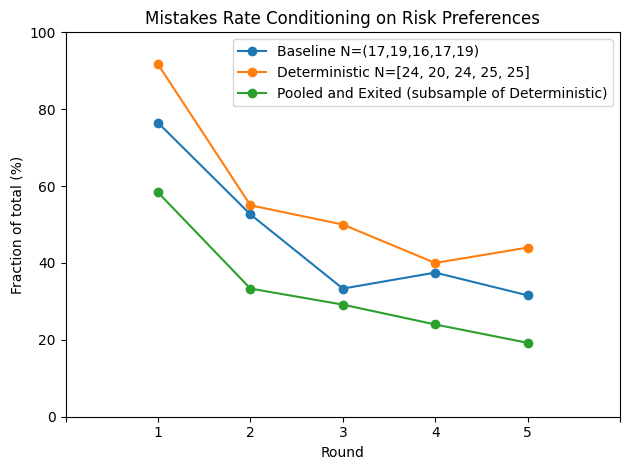

In [19]:
avgs_deterministic = []
avgs_deterministic2 = []
avgs_deterministic_sep = []
avgs_deterministic_sep2 = []

rounds_num = 5
lengths = [] 
for i in range(1,rounds_num+1):
    pooled_and_exited = []
    for ind in deterministic.index:
        if (deterministic[f'informational_cost.{i}.player.bonusChoice'][ind] == 3) and (deterministic[f'informational_cost.{i}.player.environment_choice'][ind] == 1):
            pooled_and_exited.append(1) 
        else:
            pooled_and_exited.append(0) 
    deterministic[f'pooled_and_exited{i}'] = pooled_and_exited      
    
    pooled_and_hired = []
    for ind in deterministic.index:
        if (deterministic[f'informational_cost.{i}.player.bonusChoice'][ind] != 3) and (deterministic[f'informational_cost.{i}.player.environment_choice'][ind] == 1):
            pooled_and_hired.append(1) 
        else:
            pooled_and_hired.append(0) 
    deterministic[f'pooled_and_hired{i}'] = pooled_and_hired
    
    separated_and_hired = []
    for ind in deterministic.index:
        if (deterministic[f'informational_cost.{i}.player.bonusChoice'][ind] != 3) and (deterministic[f'informational_cost.{i}.player.environment_choice'][ind] == 0):
            separated_and_hired.append(1) 
        else:
            separated_and_hired.append(0) 
    deterministic[f'separated_and_hired{i}'] = separated_and_hired
    separated_and_exited = []
    for ind in deterministic.index:
        if (deterministic[f'informational_cost.{i}.player.bonusChoice'][ind] == 3) and (deterministic[f'informational_cost.{i}.player.environment_choice'][ind] == 0):
            separated_and_exited.append(1) 
        else:
            separated_and_exited.append(0) 
    deterministic[f'separated_and_exited{i}'] = separated_and_exited
# print(deterministic[[f'pooled_and_hired{i}', f'informational_cost.{i}.player.bonusChoice', f'informational_cost.{i}.player.environment_choice']])    


for i in range(1,rounds_num+1):
#   DETERMINISTIC
    avg_environment = deterministic[deterministic[f'Round{i}Param'] != 5][f'pooled_and_hired{i}'].mean()*100
    avgs_deterministic.append(avg_environment)
#     lengths.append(len(deterministic[deterministic[f'Round{i}Param'] != 5]))
    avg_environment2 = deterministic[deterministic[f'Round{i}Param'] != 5][f'pooled_and_exited{i}'].mean()*100
    avgs_deterministic2.append(avg_environment2)
    avg_environment_sep = deterministic[deterministic[f'Round{i}Param'] != 5][f'separated_and_hired{i}'].mean()*100
    avgs_deterministic_sep.append(avg_environment_sep)
    avg_environment_sep2 = deterministic[deterministic[f'Round{i}Param'] != 5][f'separated_and_exited{i}'].mean()*100
    avgs_deterministic_sep2.append(avg_environment_sep2)
# # print('Chose risky in first round:', strategy[strategy['risk_taker_R1'] == 1]['risk_taker_R1'].count())
# # print(avgs_base, avgs_strategy)
print(avgs_deterministic, avgs_deterministic2, avgs_deterministic_sep, avgs_deterministic_sep2)

avgs_deterministic_all = []
for i in range(1,rounds_num+1):
    
# for i in range(1,2):
#   DETERMINISTIC
    deterministic_risk = deterministic[deterministic[f'risk_taker_R{i}'] == 0] # this picks people who picked safe option in that round's lottery
    avg_environment = deterministic_risk[deterministic_risk[f'Round{i}Param'] != 5][f'informational_cost.{i}.player.environment_choice'].mean()*100
    avgs_deterministic_all.append(avg_environment)
    lengths.append(len(deterministic_risk[deterministic_risk[f'Round{i}Param'] != 5]))
    
    
avgs_base=[76.47058823529412, 52.63157894736842, 33.33333333333333, 37.5, 31.57894736842105]
plt.plot(range(1,rounds_num+1), avgs_base, label=r'Baseline N=(17,19,16,17,19)', marker="o")
plt.plot(range(1,rounds_num+1), avgs_deterministic_all, label=f'Deterministic N={lengths}', marker="o")

# plt.plot(range(1,rounds_num+1), avgs_deterministic, label=f'Pooled and Hired', marker="o")
plt.plot(range(1,rounds_num+1), avgs_deterministic2, label=f'Pooled and Exited (subsample of Deterministic)', marker="o")
# plt.plot(range(1,rounds_num+1), avgs_deterministic_sep, label=f'Separated and Hired', marker="o")
# plt.plot(range(1,rounds_num+1), avgs_deterministic_sep2, label=f'Separated and Exited', marker="o")

# # plt.plot(range(1,rounds_num+1), avgs_base, label=r'Baseline N=(17,19,16,17,19)', marker="o")
# # plt.plot(range(1,2), avgs_base, label=r'Baseline N=17', marker="o")

# # plt.plot(range(1,2), avgs_salient, label=r'Salient N=20', marker="o")
# # plt.plot(range(1,rounds_num+1), avgs_salient, label=r'Salient N=(20,20,14,21,22)', marker="o")
# # plt.plot(range(1,rounds_num+1), avgs_strategy, label=r'Strategy Method N=(25,30,29,25,24)', marker="o")
# # plt.plot(range(1,2), avgs_strategy, label=r'Strategy Method N=25', marker="o")

plt.xlabel("Round")
plt.ylabel("Fraction of total (%)")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', ''])  # Set text labels.
plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
# plt.axhline(y=avgs_base_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
# plt.text(2.5,avgs_base_avg+3,str(round(avgs_base_avg,1))+'%')
# plt.text(0.85,avgs_base[0]+3,str(round(avgs_base[0]))+'%')
# plt.text(0.85,avgs_salient[0]+3,str(round(avgs_salient[0]))+'%')
# plt.text(0.85,avgs_strategy[0]-4,str(round(avgs_strategy[0]))+'%')

# plt.axhline(y=avgs_sal_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
# plt.text(2.5,avgs_sal_avg-4,str(round(avgs_sal_avg,1))+'%')

plt.legend()
plt.title(f'Mistakes Rate Conditioning on Risk Preferences')
plt.tight_layout()
plt.savefig(outputpath + 'environment_by_round_deterministic_split.png',dpi=1000)
plt.show()

## Let's look at parameterization to check whether we learn anything from that

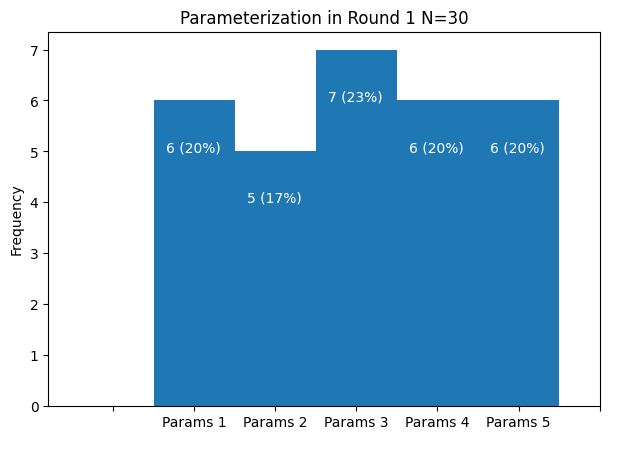

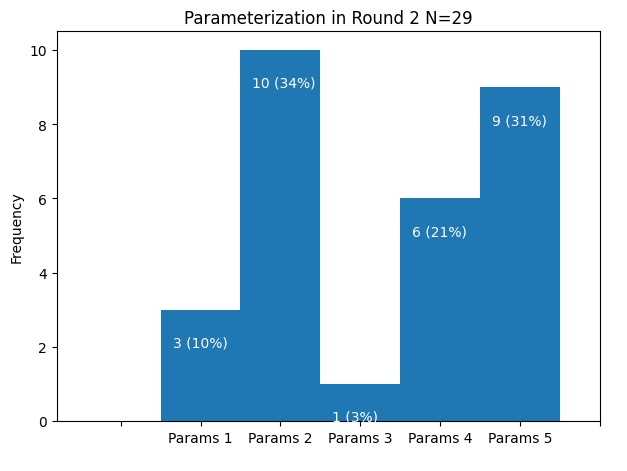

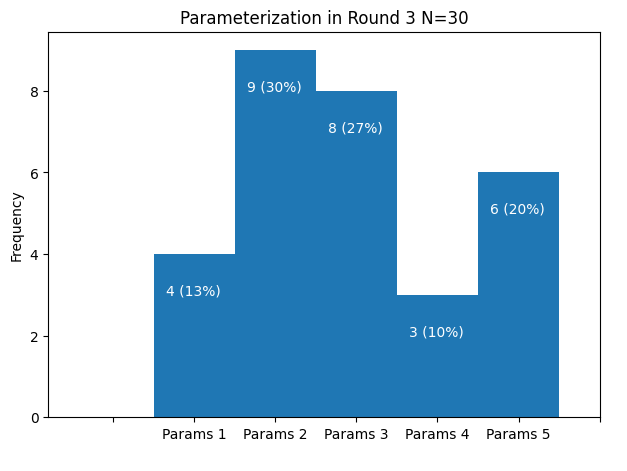

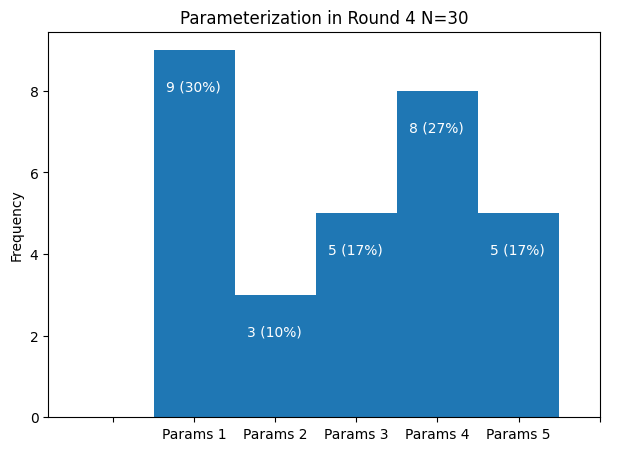

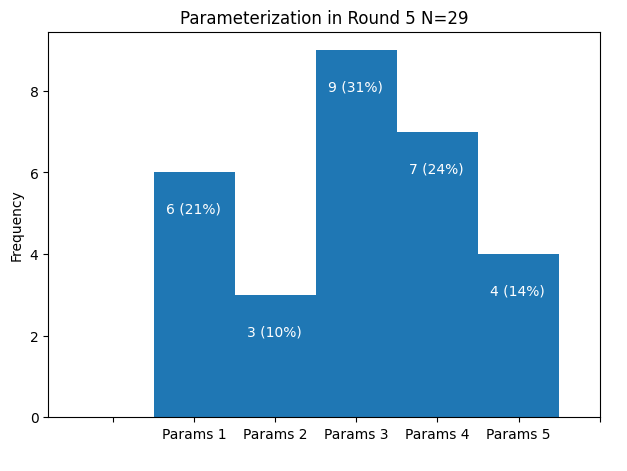

In [52]:
for i in range(1,6):    
    fig, ax = plt.subplots()
    data_risk = data[data[f'risk_taker_R{i}'] == 0] # plot only for the subsample of risk-takers
#     data_risk = data
    y = [int(i) for i in data_risk[f'Round{i}Param']] # plot only where risk-taking optimal
#     print(y)
    xLabels = ['', 'Params 1', 'Params 2', 'Params 3', 'Params 4', 'Params 5', '']
    x = np.arange(7)
    ax.hist(y,x-0.5, width=1)
    plt.ylabel('Frequency')
    for j in range(max(y)+2):
        plt.text(j-0.35,y.count(j)-1,str(y.count(j))+ ' (' + str(round(y.count(j)*100/len(y))) +'%)', color='white')
    plt.xticks(x, xLabels)
    plt.title(f'Parameterization in Round {i} N={len(y)}')
    plt.tight_layout()
#     plt.savefig(outputpath + f'Strategy_environment{i}.png',dpi=1000)
    plt.show()

## Bonus Choice

#### Destring compTypes, chosen_decisions, and environment_choice

In [393]:
try:
    for ind in data.index:
        ini_list = data['participant.compType'][ind]
        res = ini_list.strip('][').split(' ')
        data['participant.compType'][ind] = res
    print(data['participant.compType'])
except:
    print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')
# try:
#     for ind in data.index:
#         ini_list = data['participant.chosen_decisions'][ind]
#         res = ini_list.strip(')(').split(', ')
#         data['participant.chosen_decisions'][ind] = res
#     print(data['participant.chosen_decisions'])
# except:
#     print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')

18     [1, 0, 1, 1, 1]
20     [0, 0, 0, 0, 0]
21     [1, 1, 0, 0, 1]
22     [1, 1, 1, 1, 0]
23     [1, 1, 1, 1, 1]
            ...       
152    [0, 1, 1, 0, 0]
153    [1, 1, 1, 0, 0]
154    [1, 1, 0, 1, 0]
155    [0, 0, 1, 1, 1]
156    [1, 0, 0, 1, 0]
Name: participant.compType, Length: 91, dtype: object


##### Create 5 columns, each with compType for each round

In [394]:
for i in range(1,6):
    myList = []
    for ind in data.index:
        myList.append(int(data[f'participant.compType'][ind][i-1]))
    data[f'comp_type_R{i}'] = myList
base = data[data['participant.treatment']== 'base']
salient = data[data['participant.treatment']== 'salient']
strategy = data[data['participant.treatment']== 'strategy']

### Part 2: Bonus Choice - Do people know what to do with the information?


#### Baseline

In [395]:
for i in range(1,6):
    myList = []
    for ind in base.index:
        myList.append(int(base[f'informational_cost.{i}.player.environment_choice'][ind]))
    base[f'EnvChoice_R{i}'] = myList

N= 19
N= 12
N= 11
N= 9
N= 6
[57.89473684210527, 33.33333333333333, 36.36363636363637, 44.44444444444444, 33.33333333333333]


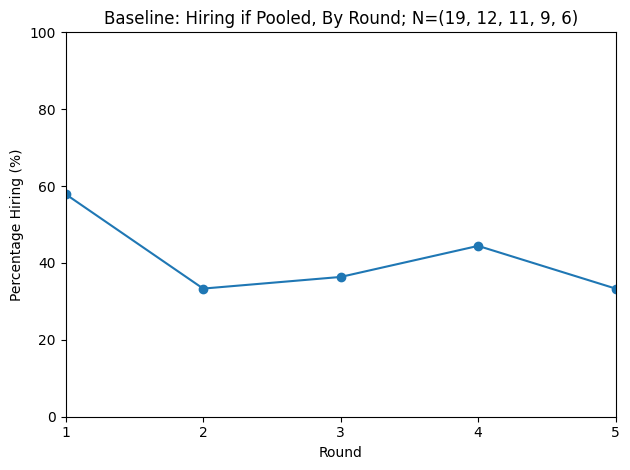

In [396]:
avgs_pool = []
for i in range(1,6):
    base_pool = base[base[f'EnvChoice_R{i}']==1]
    bonus_choice = base_pool[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(base_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
    print('N=', len(bonus_choice))
print(avgs_pool)
plt.plot(range(1,6), avgs_pool, label='Baseline - Hiring choice for those who pool', marker="o")

plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
plt.xlim(1, 5)
plt.xticks(np.arange(1,6), range(1,6))  # Set text labels.
plt.ylim(0, 100)
plt.axvline(x=5.5, linewidth=2, color = 'k')
# plt.legend()
plt.title('Baseline: Hiring if Pooled, By Round; N=(19, 12, 11, 9, 6)')
plt.tight_layout()
# plt.savefig(outputpath + 'environment_by_round.png',dpi=1000)
plt.show()

N= 19
N= 12
N= 11
N= 9
N= 6
[57.89473684210527, 33.33333333333333, 36.36363636363637, 44.44444444444444, 33.33333333333333]
N= 3
N= 5
N= 8
N= 8
N= 11
[33.33333333333333, 20.0, 25.0, 25.0, 9.090909090909092]
N= 4
N= 9
N= 7
N= 9
N= 9
[50.0, 77.77777777777779, 100.0, 77.77777777777779, 77.77777777777779]


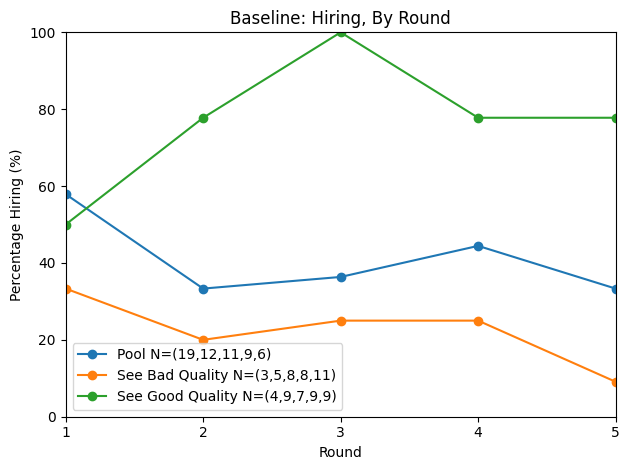

In [397]:
#  POOL
avgs_pool = []
for i in range(1,6):
    base_pool = base[base[f'EnvChoice_R{i}']==1]
    bonus_choice = base_pool[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(base_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
    print('N=', len(bonus_choice))
print(avgs_pool)
plt.plot(range(1,6), avgs_pool, label='Pool N=(19,12,11,9,6)', marker="o")

#  SEPARATE BAD
avgs_sep = []
for i in range(1,6):
    base_sep = base[base[f'EnvChoice_R{i}']==0]
    bonus_choice = base_sep[base_sep[f'comp_type_R{i}']==0][f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    print('N=', len(bonus_choice))
print(avgs_sep)
plt.plot(range(1,6), avgs_sep, label='See Bad Quality N=(3,5,8,8,11)', marker="o")

#  SEPARATE GOOD
avgs_sep = []
for i in range(1,6):
    base_sep = base[base[f'EnvChoice_R{i}']==0]
    bonus_choice = base_sep[base_sep[f'comp_type_R{i}']==1][f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    print('N=', len(bonus_choice))
print(avgs_sep)
plt.plot(range(1,6), avgs_sep, label='See Good Quality N=(4,9,7,9,9)', marker="o")

plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
plt.xlim(1, 5)
plt.xticks(np.arange(1,6), range(1,6))  # Set text labels.
plt.ylim(0, 100)
plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title(f'Baseline: Hiring, By Round')
plt.tight_layout()
plt.savefig(outputpath + 'baseline_bonus_choice_by_round.png',dpi=1000)
plt.show()

### Salient

In [398]:
for i in range(1,6):
    myList = []
    for ind in salient.index:
        myList.append(int(salient[f'informational_cost.{i}.player.environment_choice'][ind]))
    salient[f'EnvChoice_R{i}'] = myList

[55.55555555555556, 38.46153846153847, 27.27272727272727, 63.63636363636363, 41.66666666666667]
[14.285714285714285, 0.0, 0.0, 0.0, 0.0]
[75.0, 85.71428571428571, 87.5, 88.88888888888889, 88.88888888888889]


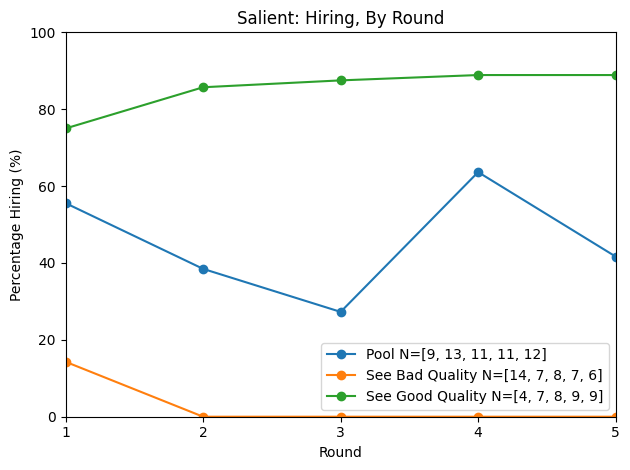

In [399]:
#  POOL
avgs_pool = []
lengths = []
for i in range(1,6):
    salient_pool = salient[salient[f'EnvChoice_R{i}']==1]
    bonus_choice = salient_pool[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(base_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
    lengths.append(len(bonus_choice))
print(avgs_pool)
plt.plot(range(1,6), avgs_pool, label=f'Pool N={lengths}', marker="o")

#  SEPARATE BAD
lengths = []
avgs_sep = []
for i in range(1,6):
    salient_sep = salient[salient[f'EnvChoice_R{i}']==0]
    bonus_choice = salient_sep[salient_sep[f'comp_type_R{i}']==0][f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    lengths.append(len(bonus_choice))
print(avgs_sep)
plt.plot(range(1,6), avgs_sep, label=f'See Bad Quality N={lengths}', marker="o")

#  SEPARATE GOOD
lengths = []
avgs_sep = []
for i in range(1,6):
    salient_sep = salient[salient[f'EnvChoice_R{i}']==0]
    bonus_choice = salient_sep[salient_sep[f'comp_type_R{i}']==1][f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    lengths.append(len(bonus_choice))
print(avgs_sep)
plt.plot(range(1,6), avgs_sep, label=f'See Good Quality N={lengths}', marker="o")

plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
plt.xlim(1, 5)
plt.xticks(np.arange(1,6), range(1,6))  # Set text labels.
plt.ylim(0, 100)
plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title(f'Salient: Hiring, By Round')
plt.tight_layout()
plt.savefig(outputpath + 'salient_bonus_choice_by_round.png',dpi=1000)
plt.show()

### Strategy Method

[47.368421052631575, 39.473684210526315, 36.84210526315789, 36.84210526315789, 34.21052631578947]
[15.789473684210526, 10.526315789473683, 7.894736842105263, 15.789473684210526, 15.789473684210526]
[84.21052631578947, 63.1578947368421, 81.57894736842105, 71.05263157894737, 86.8421052631579]


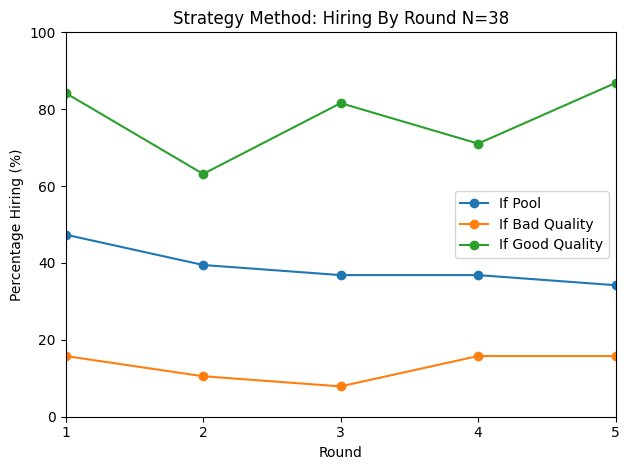

In [400]:
#  POOL
avgs_pool = []
for i in range(1,6):
    bonus_choice = strategy[f'strategy_method.{i}.player.bonusChoicePool'].replace(3, 0)
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(base_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
lengths = len(bonus_choice)
print(avgs_pool)
plt.plot(range(1,6), avgs_pool, label='If Pool', marker="o")

#  SEPARATE BAD
avgs_sep = []
for i in range(1,6):
    bonus_choice = strategy[f'strategy_method.{i}.player.bonusChoiceSepBad'].replace(3, 0)
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
lengths = len(bonus_choice)
print(avgs_sep)
plt.plot(range(1,6), avgs_sep, label='If Bad Quality', marker="o")

#  SEPARATE GOOD
avgs_sep = []
for i in range(1,6):
    bonus_choice = strategy[f'strategy_method.{i}.player.bonusChoiceSepGood'].replace(3, 0)
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
lengths = len(bonus_choice)
print(avgs_sep)
plt.plot(range(1,6), avgs_sep, label='If Good Quality', marker="o")

plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
plt.xlim(1, 5)
plt.xticks(np.arange(1,6), range(1,6))  # Set text labels.
plt.ylim(0, 100)
plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title(f'Strategy Method: Hiring By Round N={lengths}')
plt.tight_layout()
plt.savefig(outputpath + 'strategy_bonus_choice_by_round.png',dpi=1000)
plt.show()

#### Let's condition on what they do in part 1

##### First, condition on what they'll actually will end up doing

In [401]:
for i in range(1,6):
    myList = []
    for ind in strategy.index:
        myList.append(int(strategy[f'strategy_method.{i}.player.environment_choice'][ind]))
    strategy[f'EnvChoice_R{i}'] = myList

[50.0, 31.25, 41.66666666666667, 50.0, 50.0]
[11.538461538461538, 9.090909090909092, 3.8461538461538463, 0.0, 7.6923076923076925]
[88.46153846153845, 77.27272727272727, 96.15384615384616, 76.92307692307693, 88.46153846153845]


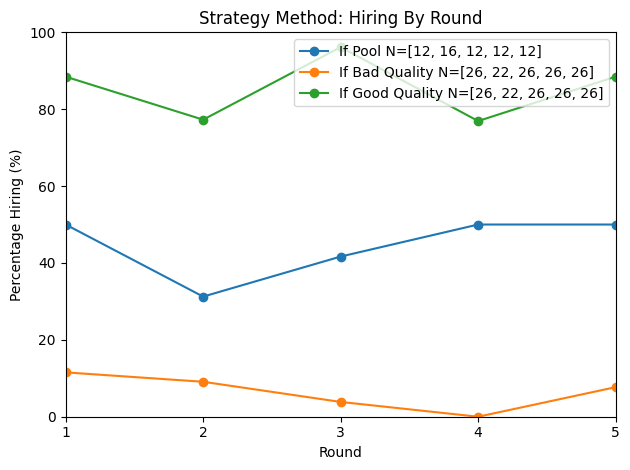

In [402]:
#  POOL
lengths = []
avgs_pool = []
for i in range(1,6):
    strategy_pool = strategy[strategy[f'EnvChoice_R{i}']==1]
    bonus_choice = strategy_pool[f'strategy_method.{i}.player.bonusChoicePool'].replace(3, 0)
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(base_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
    lengths.append(len(bonus_choice))
print(avgs_pool)
plt.plot(range(1,6), avgs_pool, label=f'If Pool N={lengths}', marker="o")

#  SEPARATE BAD
lengths = []
avgs_sep = []
for i in range(1,6):
    strategy_sep = strategy[strategy[f'EnvChoice_R{i}']==0]
    bonus_choice = strategy_sep[f'strategy_method.{i}.player.bonusChoiceSepBad'].replace(3, 0)
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    lengths.append(len(bonus_choice))
print(avgs_sep)
plt.plot(range(1,6), avgs_sep, label=f'If Bad Quality N={lengths}', marker="o")

#  SEPARATE GOOD
lengths = []
avgs_sep = []
for i in range(1,6):
    strategy_sep = strategy[strategy[f'EnvChoice_R{i}']==0]
    bonus_choice = strategy_sep[f'strategy_method.{i}.player.bonusChoiceSepGood'].replace(3, 0)
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    lengths.append(len(bonus_choice))
print(avgs_sep)
plt.plot(range(1,6), avgs_sep, label=f'If Good Quality N={lengths}', marker="o")

plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
plt.xlim(1, 5)
plt.xticks(np.arange(1,6), range(1,6))  # Set text labels.
plt.ylim(0, 100)
plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title('Strategy Method: Hiring By Round')
plt.tight_layout()
plt.savefig(outputpath + 'strategy_bonus_choice_by_round_matters.png',dpi=1000)
plt.show()

##### Now, check what those who pooled said they would have done if separating

[25.0, 12.5, 16.666666666666664, 50.0, 33.33333333333333]
[75.0, 43.75, 50.0, 58.333333333333336, 83.33333333333334]


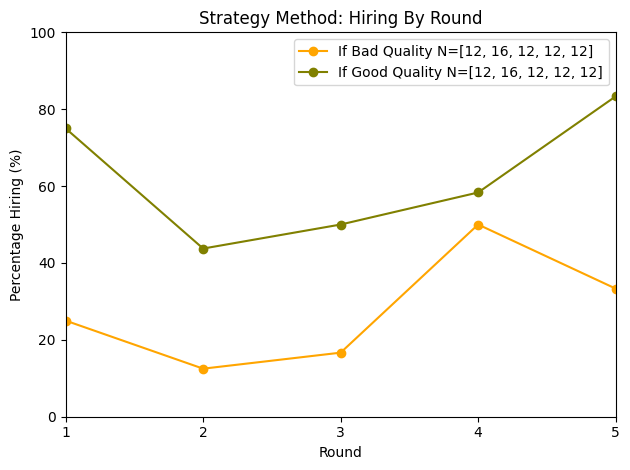

In [403]:
#  SEPARATE BAD
lengths = []
avgs_sep = []
for i in range(1,6):
    strategy_sep = strategy[strategy[f'EnvChoice_R{i}']==1]
    bonus_choice = strategy_sep[f'strategy_method.{i}.player.bonusChoiceSepBad'].replace(3, 0)
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    lengths.append(len(bonus_choice))
print(avgs_sep)
plt.plot(range(1,6), avgs_sep, label=f'If Bad Quality N={lengths}', marker="o", color='orange')

#  SEPARATE GOOD
lengths = []
avgs_sep = []
for i in range(1,6):
    strategy_sep = strategy[strategy[f'EnvChoice_R{i}']==1]
    bonus_choice = strategy_sep[f'strategy_method.{i}.player.bonusChoiceSepGood'].replace(3, 0)
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    lengths.append(len(bonus_choice))
print(avgs_sep)
plt.plot(range(1,6), avgs_sep, label=f'If Good Quality N={lengths}', marker="o", color='olive')

plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
plt.xlim(1, 5)
plt.xticks(np.arange(1,6), range(1,6))  # Set text labels.
plt.ylim(0, 100)
plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title('Strategy Method: Hiring By Round')
plt.tight_layout()
plt.savefig(outputpath + 'strategy_bonus_choice_by_round_NOTmatters.png',dpi=1000)
plt.show()

In [404]:
base_pool1 = base_all[base_all['EnvChoice1']==1]
base_sep_good1 = base_all[(base_all['EnvChoice1']==0) & (base_all['RoundCounts1CompType']==1)]
base_sep_bad1 = base_all[(base_all['EnvChoice1']==0) & (base_all['RoundCounts1CompType']==0)]
base_pool2 = base_all[base_all['EnvChoice2']==1]
base_sep_good2 = base_all[(base_all['EnvChoice2']==0) & (base_all['RoundCounts2CompType']==1)]
base_sep_bad2 = base_all[(base_all['EnvChoice2']==0) & (base_all['RoundCounts2CompType']==0)]
base_sep_bad2
#%%
# Those who pool in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_pool1['informational_cost.5.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (pool, first) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who pool in second part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_pool2['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (pool, second) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Good in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_sep_good1['informational_cost.5.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (separate, good, first) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Good in second part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_sep_good2['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (separate, good, second) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Bad in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_sep_bad1['informational_cost.5.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (separate, bad, first) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Bad in second part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_sep_bad2['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (separate, bad, second) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

NameError: name 'base_all' is not defined

### Salient part 2

In [ ]:
#%%
salient_all = data[data['participant.treatment']=='salient']
for ind in salient_all.index:
    salient_all['participant.chosen_decisions'][ind] = int(salient_all['participant.chosen_decisions'][ind][0])
salient_all = salient_all[(salient_all['participant.chosen_decisions']<6)]
#%%
myList = []
for ind in salient_all.index:
    myList.append(int(salient_all['participant.compType'][ind][int(salient_all['participant.chosen_decisions'][ind])-1]))
    # print(myList,  data['participant.compType'])
salient_all['RoundCounts1CompType'] = myList
#%%
myList = []
for ind in salient_all.index:
    r1 = int(salient_all['participant.chosen_decisions'][ind])
    myList.append(int(salient_all[f'informational_cost.{r1}.player.environment_choice'][ind]))
    # print(myList,  data['participant.compType'])
salient_all['EnvChoice1'] = myList
#%%
salient_pool = salient_all[salient_all['EnvChoice1']==1]
salient_sep_good = salient_all[(salient_all['EnvChoice1']==0) & (salient_all['RoundCounts1CompType']==1)]
salient_sep_bad = salient_all[(salient_all['EnvChoice1']==0) & (salient_all['RoundCounts1CompType']==0)]
#%%
# Those who pool in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in salient_pool['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Salient - Part 2 (pool) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Good in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in salient_sep_good['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Salient - Part 2 (separate, good) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Bad in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in salient_sep_bad['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Salient - Part 2 (separate, bad) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

### Deterministic part 2

In [ ]:
#%%
det_all = data[(data['participant.treatment'] == 'deterministic')]
for ind in det_all.index:
    det_all['participant.chosen_decisions'][ind] = int(det_all['participant.chosen_decisions'][ind][0])
det_all = det_all[(det_all['participant.chosen_decisions']<6)]

myList = []
for ind in det_all.index:
    r1 = int(det_all['participant.chosen_decisions'][ind])
    myList.append(int(det_all[f'informational_cost.{r1}.player.environment_choice'][ind]))
    # print(myList,  data['participant.compType'])
det_all['EnvChoice1'] = myList
det_pool = det_all[det_all['EnvChoice1'] == 1]
det_sep = det_all[det_all['EnvChoice1'] == 0]
#%%
# Those who pool in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_pool['informational_cost.10.player.bonusChoice']]
xLabels = ['', 'Good', 'Bad', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Deterministic - Part 2 (pool) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_sep['informational_cost.10.player.bonusChoice']]
xLabels = ['', 'Good', 'Bad', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Deterministic - Part 2 (separate) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()